<a href="https://colab.research.google.com/github/nabhanibrhm/BananaClassification/blob/main/Banana_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Klasifikasi Pisang dengan Metode Convolutional Neural Network

Klasifikasi ini bertujuan untuk melakukan klasifikasi terhadap 4 jenis pisang dengan menggunakan metode Convolutional Neural Network.

Dataset yang digunakan sebesar 7280 gambar pisang cavendish, pisang kepok, pisang raja, dan pisang tanduk.

Seluruh dataset diambil menggunakan Kamera ponsel dan dibagi menjadi data latih, data validasi, dan data uji dengan perbandingan sebesar 80:10:10

Luthfi Nabhan Ibrahim


##Import Library yang dibutuhkan 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from google.colab import files

import itertools

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
dir_barangan = os.path.join('/content/drive/MyDrive/Skripsi Klasifikasi Pisang/Dataset/train/01barangan')
dir_cavendish = os.path.join('/content/drive/MyDrive/Skripsi Klasifikasi Pisang/Dataset/train/02cavendish')
dir_kepok = os.path.join('/content/drive/MyDrive/Skripsi Klasifikasi Pisang/Dataset/train/03kepok')
dir_raja = os.path.join('/content/drive/MyDrive/Skripsi Klasifikasi Pisang/Dataset/train/04raja')
dir_tanduk = os.path.join('/content/drive/MyDrive/Skripsi Klasifikasi Pisang/Dataset/train/05tanduk')

print('Jumlah train pisang barangan:', len(os.listdir(dir_barangan)))
print('Jumlah train pisang cavendish:', len(os.listdir(dir_cavendish)))
print('Jumlah train pisang kepok:', len(os.listdir(dir_kepok)))
print('Jumlah train pisang raja:', len(os.listdir(dir_raja)))
print('Jumlah train pisang tanduk:', len(os.listdir(dir_tanduk)))
"""

Jumlah train pisang barangan: 1477
Jumlah train pisang cavendish: 1673
Jumlah train pisang kepok: 1512
Jumlah train pisang raja: 1463
Jumlah train pisang tanduk: 1547


In [ ]:
"""
file_barangan = os.listdir(dir_barangan)
file_cavendish = os.listdir(dir_cavendish)
file_kepok = os.listdir(dir_kepok)
file_raja = os.listdir(dir_raja)
file_tanduk = os.listdir(dir_tanduk)

pic_index = 2

next_barangan = [os.path.join(dir_barangan, fname) for fname in file_barangan[pic_index-2:pic_index]]
next_cavendish = [os.path.join(dir_cavendish, fname) for fname in file_cavendish[pic_index-2:pic_index]]
next_kepok = [os.path.join(dir_kepok, fname) for fname in file_kepok[pic_index-2:pic_index]]
next_raja = [os.path.join(dir_raja, fname) for fname in file_raja[pic_index-2:pic_index]]
next_tanduk = [os.path.join(dir_tanduk, fname) for fname in file_tanduk[pic_index-2:pic_index]]

for i, img_path in enumerate(next_barangan+next_cavendish+next_kepok+next_raja+next_tanduk):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
"""

##Pre-processing gambar

In [ ]:
#Upload train dan validation gambar dan pre processing gambar
TRAINING_DIR = "/content/drive/MyDrive/skripsi/Dataset/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=15,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/skripsi/Dataset/validation"
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
#Membuat train generator
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,target_size=(256,256),class_mode='categorical',batch_size=32,shuffle=True)

Found 5096 images belonging to 4 classes.


In [ ]:
#Membuat validation generator
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,target_size=(256,256),class_mode='categorical',batch_size=32,shuffle=True)

Found 1092 images belonging to 4 classes.


##Membuat model Convolutional Neural Network

In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(1, 1),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 254, 254, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       7

##Compile model, melatih model, dan menyimpan model

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(
    train_generator, 
    epochs=20, steps_per_epoch=40, 
    validation_data = validation_generator, 
    verbose = 1)
model.save("/content/drive/MyDrive/skripsi/model20-07-21 no 2 40.h5")

Epoch 1/20
40/40 [==============================] - 1554s 38s/step - loss: 1.3053 - accuracy: 0.3336 - val_loss: 1.1369 - val_accuracy: 0.4890
Epoch 2/20
40/40 [==============================] - 708s 18s/step - loss: 0.8566 - accuracy: 0.5924 - val_loss: 0.9966 - val_accuracy: 0.5467
Epoch 3/20
40/40 [==============================] - 552s 14s/step - loss: 0.6405 - accuracy: 0.7125 - val_loss: 0.4740 - val_accuracy: 0.8040
Epoch 4/20
40/40 [==============================] - 447s 11s/step - loss: 0.5582 - accuracy: 0.7398 - val_loss: 0.8200 - val_accuracy: 0.5842
Epoch 5/20
40/40 [==============================] - 339s 9s/step - loss: 0.5685 - accuracy: 0.7643 - val_loss: 0.3700 - val_accuracy: 0.8608
Epoch 6/20
40/40 [==============================] - 318s 8s/step - loss: 0.3883 - accuracy: 0.8523 - val_loss: 0.3317 - val_accuracy: 0.8837
Epoch 7/20
40/40 [==============================] - 227s 6s/step - loss: 0.5362 - accuracy: 0.7755 - val_loss: 0.3635 - val_accuracy: 0.8828
Epoch 8/

##Membuat Diagram hasil predict dan validasi

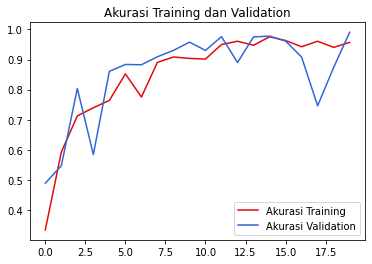

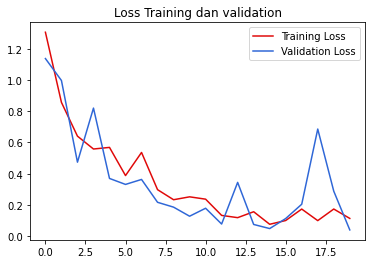

<Figure size 432x288 with 0 Axes>

In [ ]:
#Membuat plot predict
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, '#e00909', label='Akurasi Training')
plt.plot(epochs, val_acc, '#2f67d7', label='Akurasi Validation')
plt.title('Akurasi Training dan Validation')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, '#e00909', label='Training Loss')
plt.plot(epochs, val_loss, '#2f67d7', label='Validation Loss')
plt.title('Loss Training dan validation')
plt.legend(loc=0)
plt.figure()

plt.show()

##Load Model

In [3]:
model = keras.models.load_model('/content/drive/MyDrive/skripsi/model20-07-21 no 2 40.h5')

In [5]:
model.evaluate()

<bound method Model.evaluate of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7feec1341fd0>>

##Menyiapkan dan melakukan pre-processing pada data uji

In [6]:
TEST_DIR = "/content/drive/MyDrive/skripsi/Dataset/test"
test_datagen = ImageDataGenerator(
    rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(256,256),
    batch_size=32,
    shuffle=False,
    class_mode='categorical')
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

Found 1092 images belonging to 4 classes.


##Melakukan prediksi dengan menggunakan data uji

In [8]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
Hasil = model.evaluate(test_generator)
print("test loss, test acc:", Hasil)

Evaluate on test data
35/35 [==============================] - 492s 14s/step - loss: 0.3303 - accuracy: 0.8929
test loss, test acc: [0.33033525943756104, 0.8928571343421936]


In [38]:
result= model.predict_classes(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [9]:
predictions = model.predict(test_generator, steps=test_steps_per_epoch)

##Mengambil hasil prediksi

In [10]:
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_generator.classes
class_names = test_generator.class_indices.keys()

##Evaluasi : Membuat Classification Report

In [11]:
#Membuat Classification report
target_names = ['Cavendish','Kepok','Raja','Tanduk']
report = metrics.classification_report(true_classes, predicted_classes, target_names=target_names)
print(report)

              precision    recall  f1-score   support

   Cavendish       1.00      1.00      1.00       273
       Kepok       1.00      0.97      0.99       273
        Raja       1.00      0.60      0.75       273
      Tanduk       0.70      1.00      0.82       273

    accuracy                           0.89      1092
   macro avg       0.93      0.89      0.89      1092
weighted avg       0.93      0.89      0.89      1092



##Evaluasi : Membuat Confusion Matrix Heatmap

<Figure size 432x288 with 0 Axes>

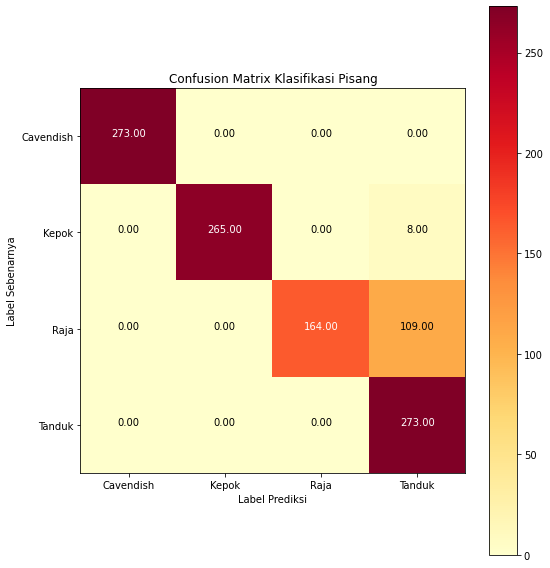

In [29]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.YlOrRd):
  plt.figure(figsize=(8,8))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, ['Cavendish','Kepok','Raja','Tanduk'])
  plt.yticks(tick_marks, ['Cavendish','Kepok','Raja','Tanduk'])
  fmt = '.2f'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment= "center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Label Sebenarnya')
    plt.xlabel('Label Prediksi')
    plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/skripsi/Heatmap Confusion Matrix.jpg')
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix Klasifikasi Pisang')

##Menampilkan hasil prediksi dalam pada tiap data uji

ValueError: ignored

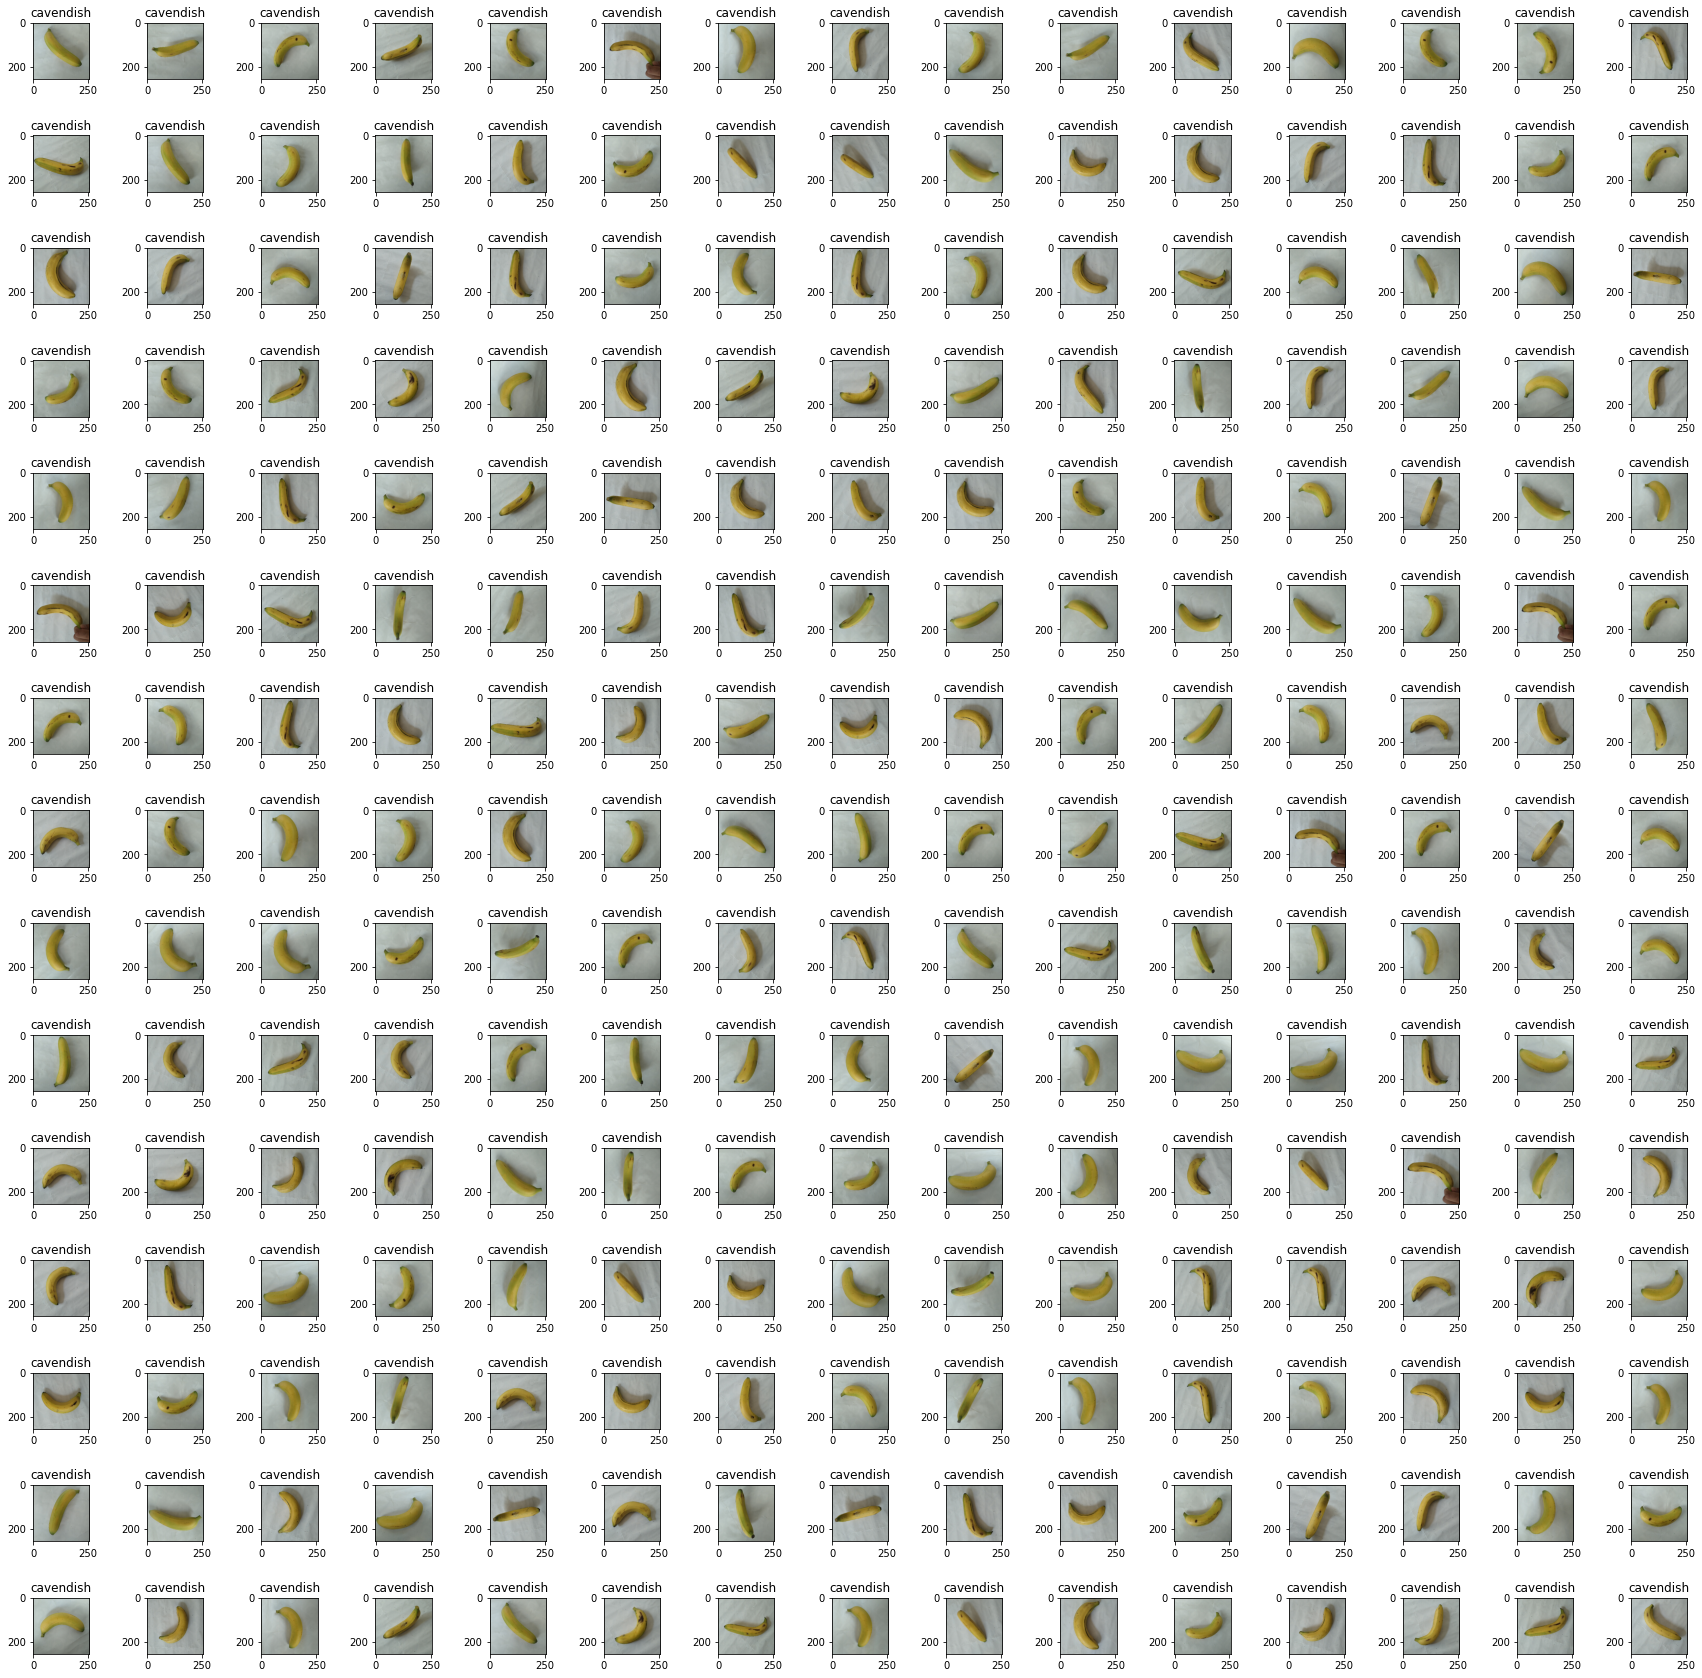

In [40]:
testing_path1 = '/content/drive/MyDrive/skripsi/Dataset/test/01cavendish'
i = 0
plt.figure(figsize=[30,30]) # ukuran gambar
plt.subplots_adjust(wspace = 0.5, hspace = 1)# jarak antara subplot
for filename in os.listdir(testing_path1):
  if filename.endswith(".jpg"):
    img= image.load_img(testing_path1+'/'+filename, target_size=(256,256,3))
    img = np.asarray(img)
    plt.subplot(15,15,i+1) #m = baris n= kolom p= nomor urut indeks
    i+=1
    imgplot = plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    output = model.predict(img)
    result = output[0]
    final = np.argmax(result)
    if final == 0:
      plt.title("predicted cavendish")
    if final == 1:
      plt.title("kepok")
    if final == 2:
      plt.title("raja")
    if final == 3:
      plt.title("tanduk")
  plt.savefig('/content/drive/MyDrive/skripsi/Prediksi Barangan.jpg')

ValueError: ignored

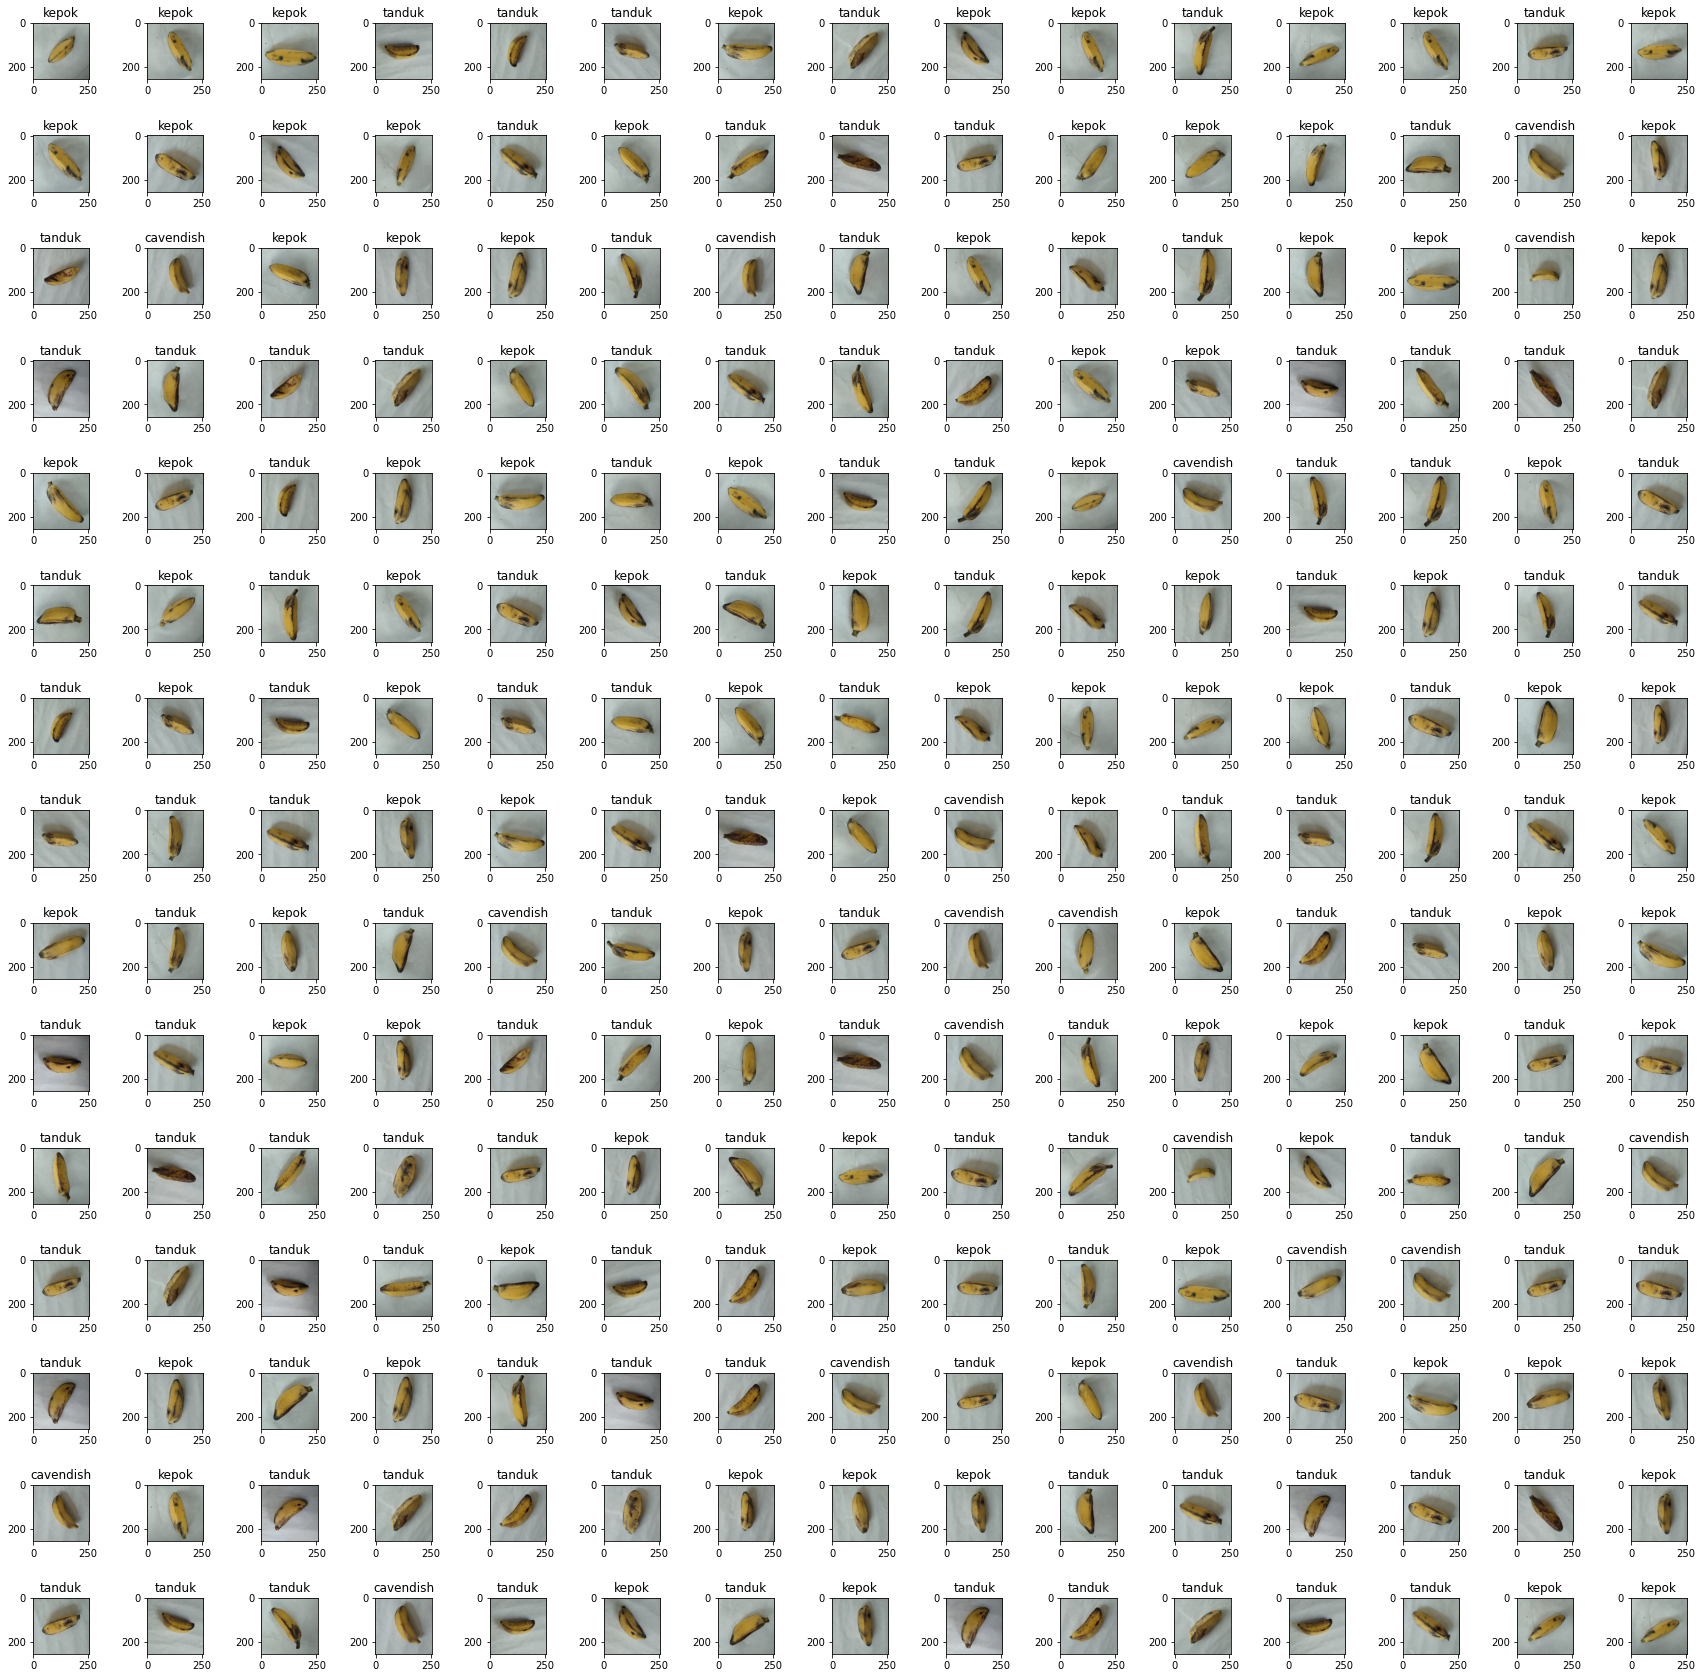

In [ ]:
testing_path2 = '/content/drive/MyDrive/skripsi/Dataset/test/02kepok'
i = 0
plt.figure(figsize=[30,30]) # ukuran gambar
plt.subplots_adjust(wspace = 0.5, hspace = 1)# jarak antara subplot
for filename in os.listdir(testing_path2):
  if filename.endswith(".jpg"):
    img= image.load_img(testing_path2+'/'+filename, target_size=(256,256,3))
    img = np.asarray(img)
    plt.subplot(15,15,i+1) #m = baris n= kolom p= nomor urut indeks
    i+=1
    imgplot = plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    output = model.predict(img)
    result = output[0]
    final = np.argmax(result)
    if final == 0:
      plt.title("cavendish")
    if final == 1:
      plt.title("kepok")
    if final == 2:
      plt.title("raja")
    if final == 3:
      plt.title("tanduk")
  plt.savefig('/content/drive/MyDrive/skripsi/Prediksi Kepok.jpg')

ValueError: ignored

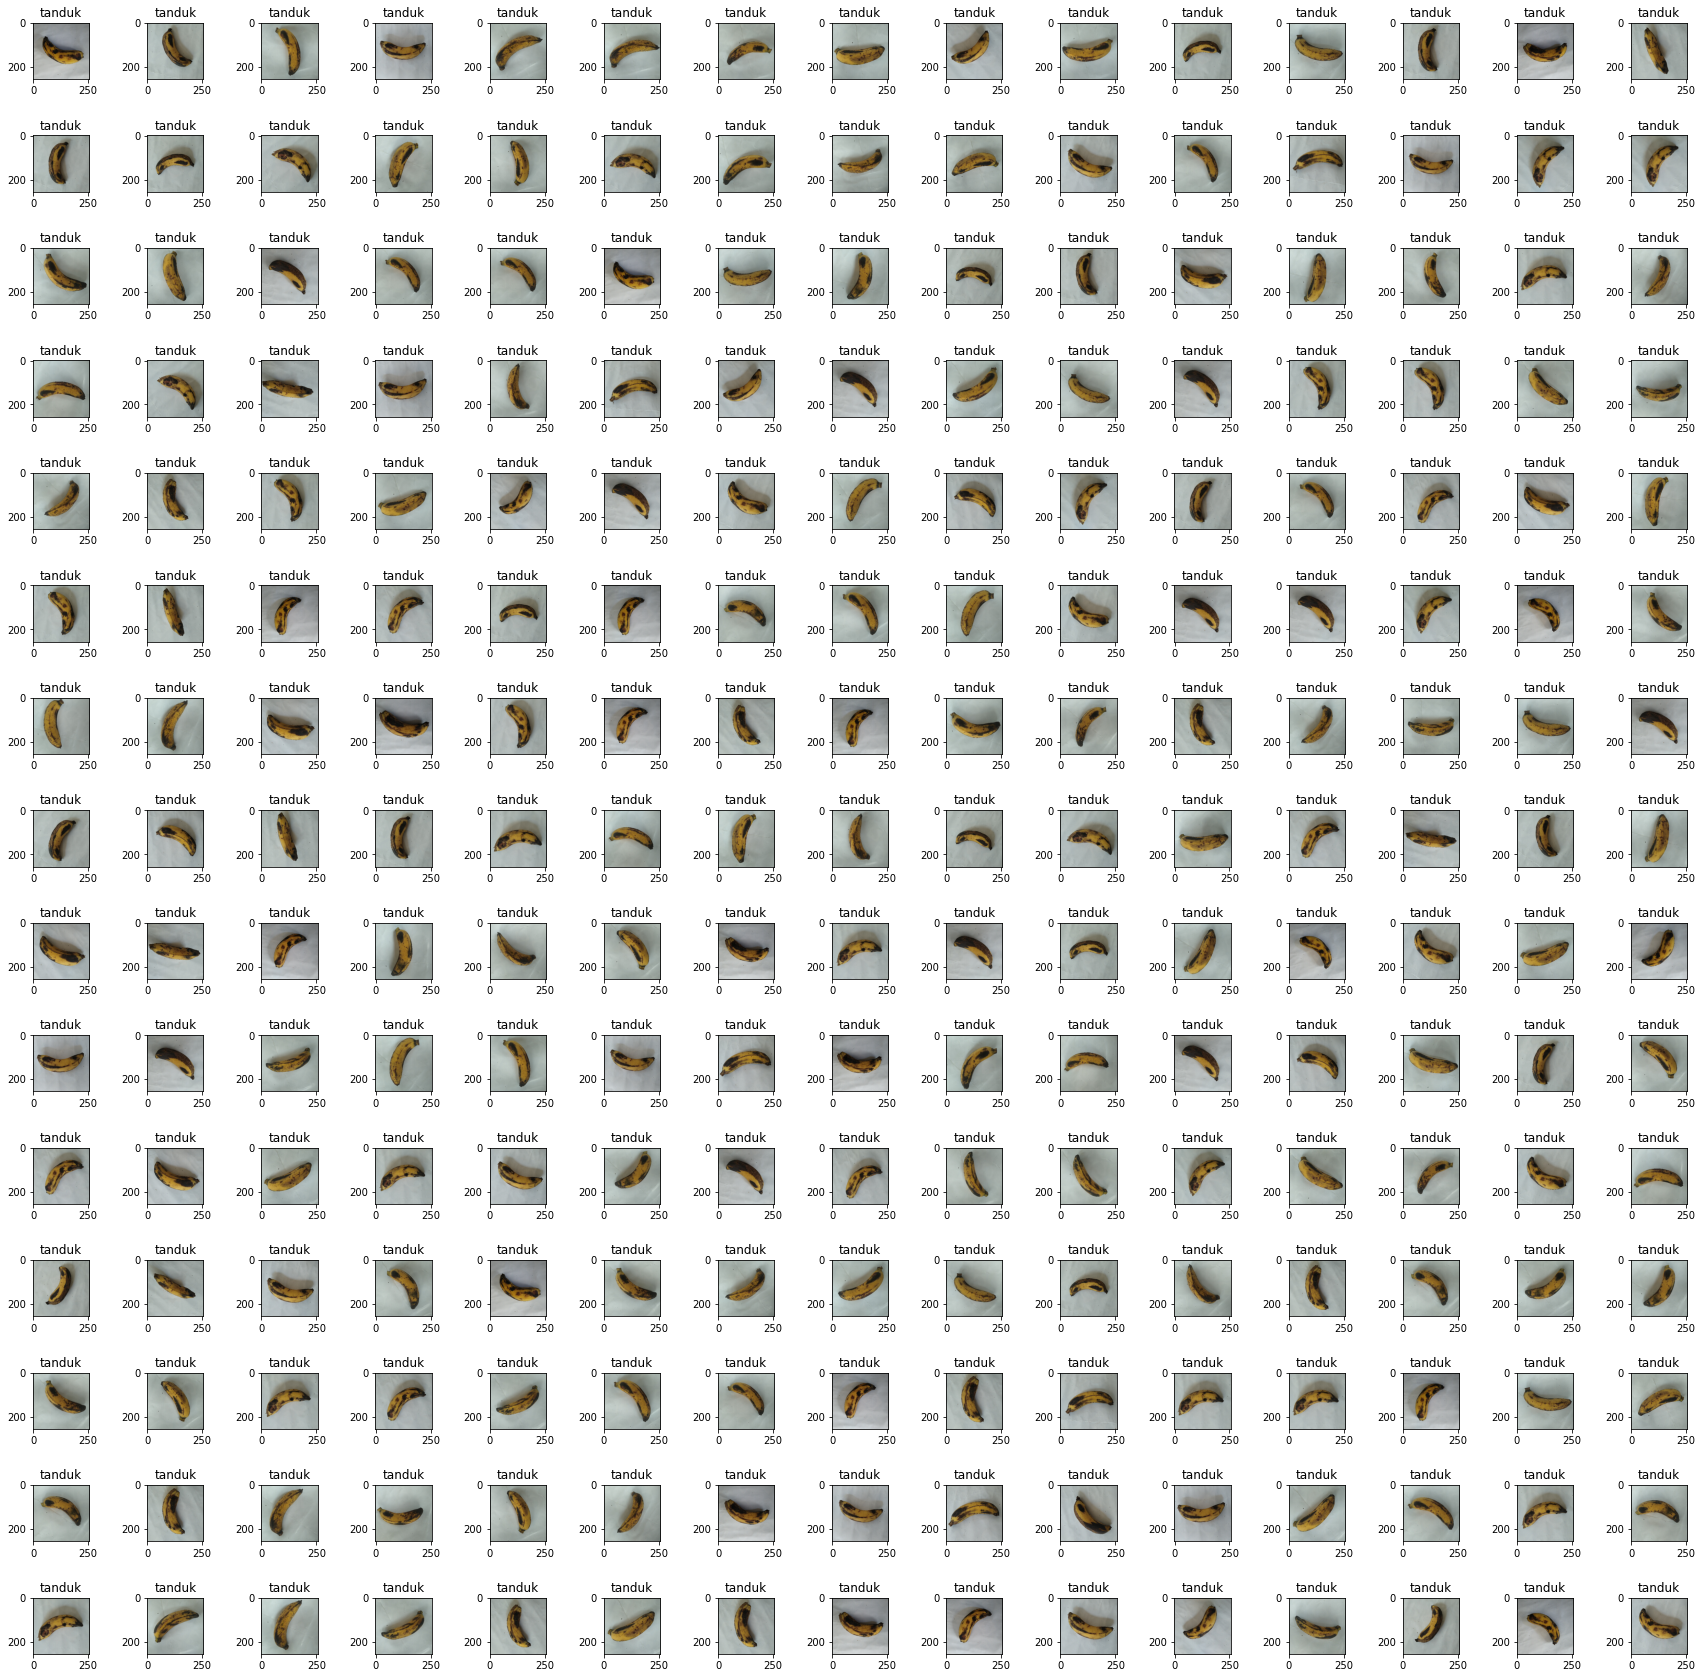

In [ ]:
testing_path3 = '/content/drive/MyDrive/skripsi/Dataset/test/03raja'
i = 0
plt.figure(figsize=[30,30]) # ukuran gambar
plt.subplots_adjust(wspace = 0.5, hspace = 1)# jarak antara subplot
for filename in os.listdir(testing_path3):
  if filename.endswith(".jpg"):
    img= image.load_img(testing_path3+'/'+filename, target_size=(256,256,3))
    img = np.asarray(img)
    plt.subplot(15,15,i+1) #m = baris n= kolom p= nomor urut indeks
    i+=1
    imgplot = plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    output = model.predict(img)
    result = output[0]
    final = np.argmax(result)
    if final == 0:
      plt.title("cavendish")
    if final == 1:
      plt.title("kepok")
    if final == 2:
      plt.title("raja")
    if final == 3:
      plt.title("tanduk")
  plt.savefig('/content/drive/MyDrive/skripsi/Prediksi Raja.jpg')

ValueError: ignored

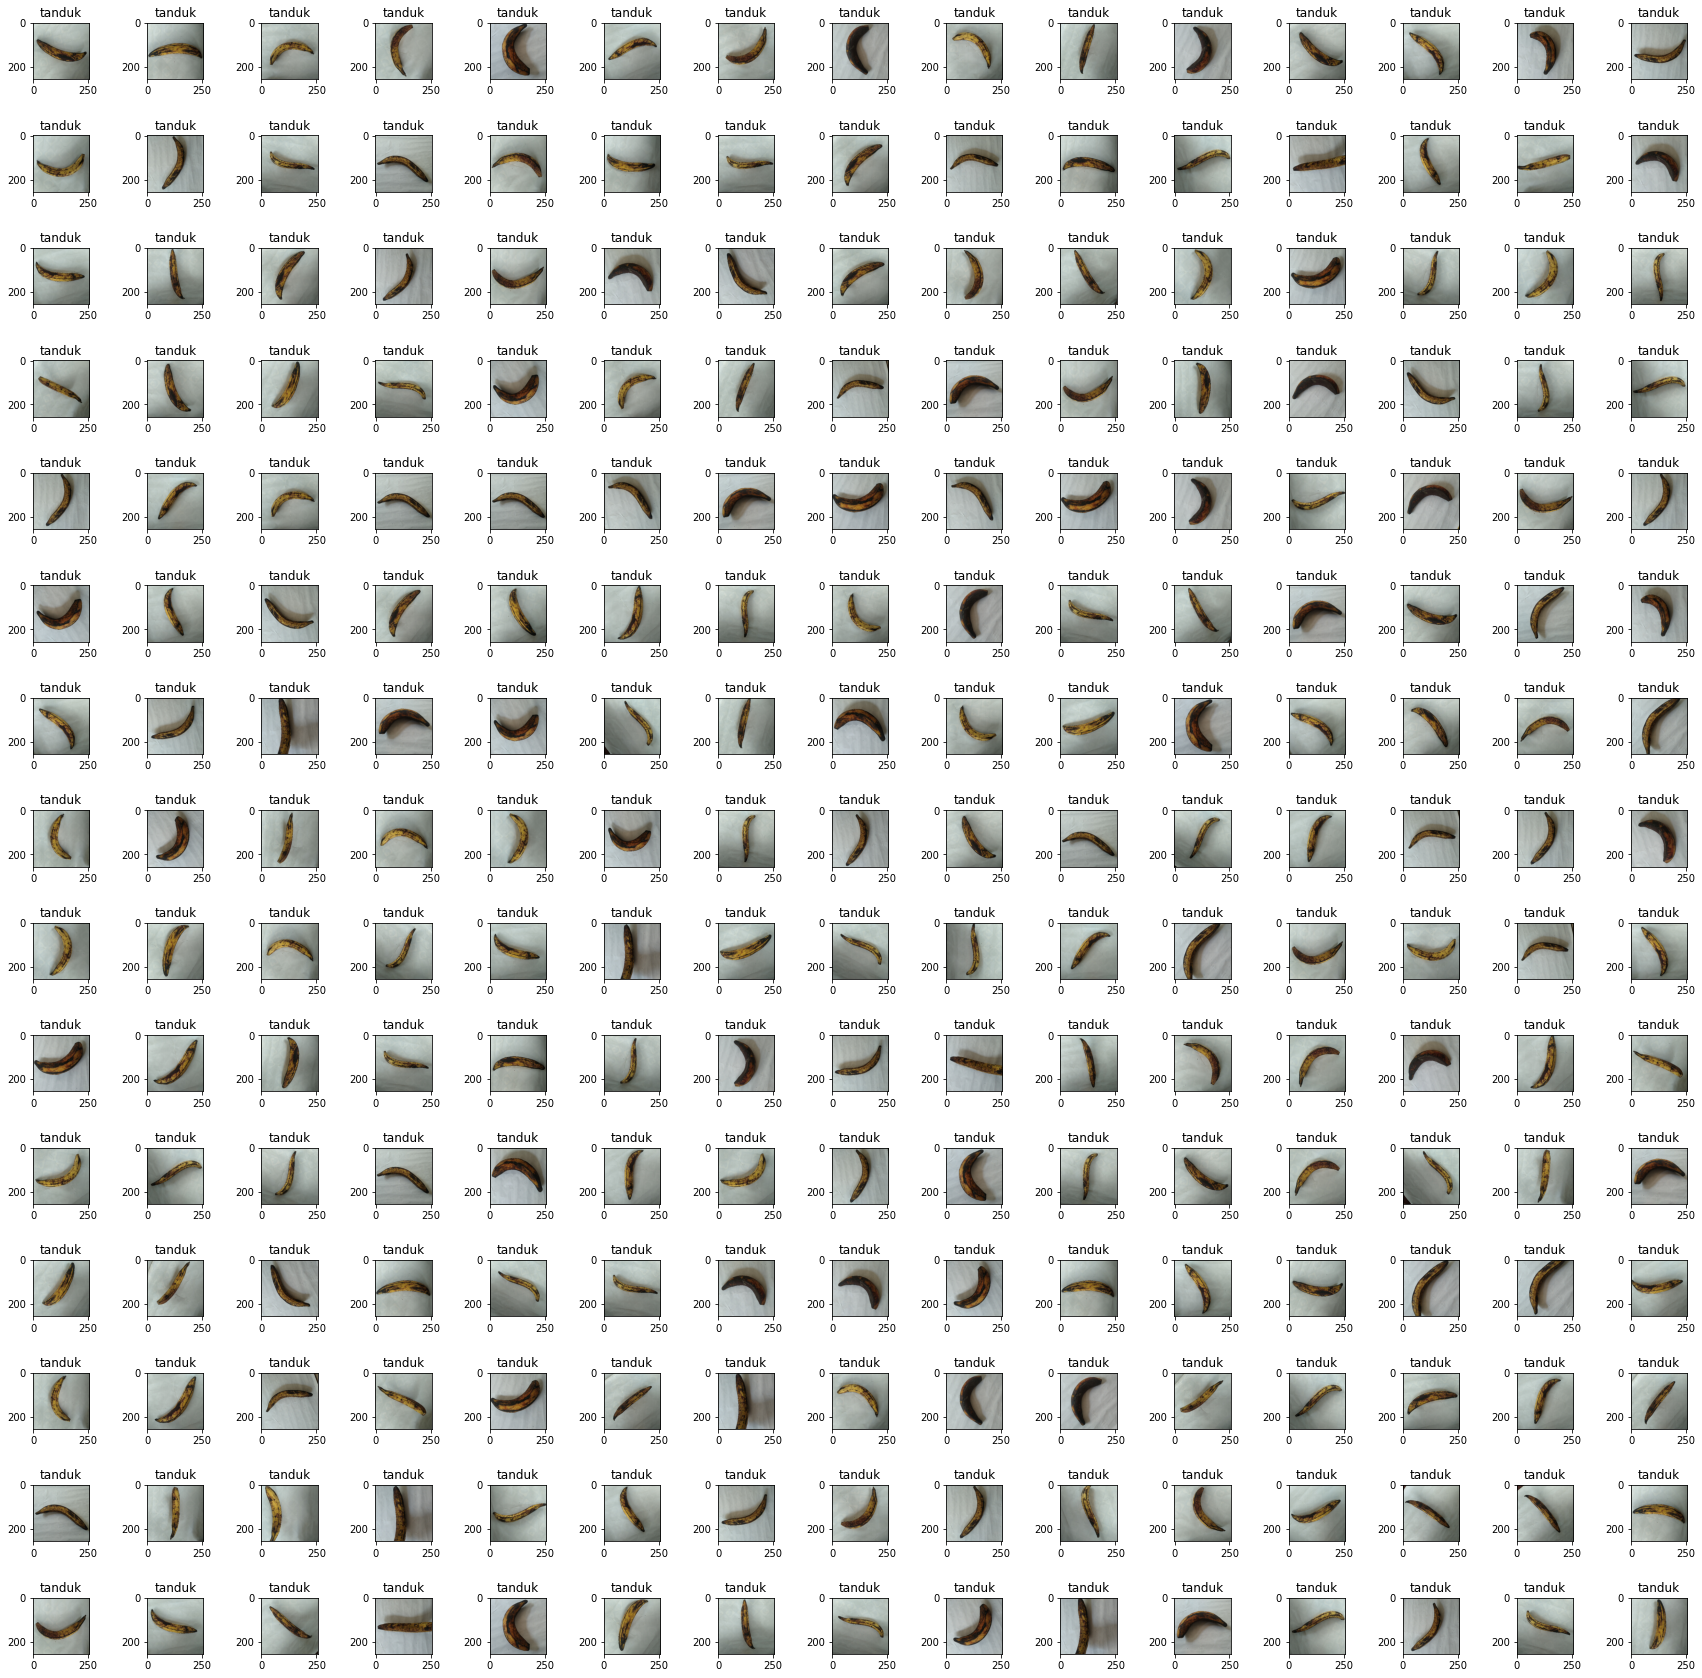

In [ ]:
testing_path4 = '/content/drive/MyDrive/skripsi/Dataset/test/04tanduk'
i = 0
plt.figure(figsize=[30,30]) # ukuran gambar
plt.subplots_adjust(wspace = 0.5, hspace = 1)# jarak antara subplot
for filename in os.listdir(testing_path4):
  if filename.endswith(".jpg"):
    img= image.load_img(testing_path4+'/'+filename, target_size=(256,256,3))
    img = np.asarray(img)
    plt.subplot(15,15,i+1) #m = baris n= kolom p= nomor urut indeks
    i+=1
    imgplot = plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    output = model.predict(img)
    result = output[0]
    final = np.argmax(result)
    if final == 0:
      plt.title("cavendish")
    if final == 1:
      plt.title("kepok")
    if final == 2:
      plt.title("raja")
    if final == 3:
      plt.title("tanduk")

##Melakukan prediksi dengan gambar baru

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 path = fn
 img = image.load_img(path, target_size=(256, 256))
 x = image.img_to_array(img)
 x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
#print(fn)
print(classes)

Saving 783f5b0f44cb024983976269c04db1f2.jpg to 783f5b0f44cb024983976269c04db1f2 (1).jpg
[[1. 0. 0. 0.]]
